In [1]:
import numpy as np
import scipy.stats as ss
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./dataset.csv',index_col = 'index')

To keep all scales balanced

In [3]:
df['Redirect'] = df['Redirect'].replace({0:-1})

There are no columns with null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11055 entries, 1 to 11055
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [5]:
df.isnull().sum()

having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

The data consists of multiple duplicates which lead to bias while modelling. There are 5206 duplicates which constituents 47% of data. We must drop it.

In [6]:
df.shape

(11055, 31)

In [7]:
df.describe()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The data is not imbalanced as the number of samples in both classes are similar

In [8]:
df['Result'].value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

Bar graph for all columns. Most columns are skewed 
columns skewed towards right - 'Shortining_Service', 'having_At_Symbol', 'Domain_registeration_length', 'Favicon', 'HTTPS_token', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'Google_Index', 'Statistical_report' 
columns skewed to left - 'URLURL_Length', 'double_slash_redirecting', 'Redirect'

In [9]:
col_iter = iter(df.columns)

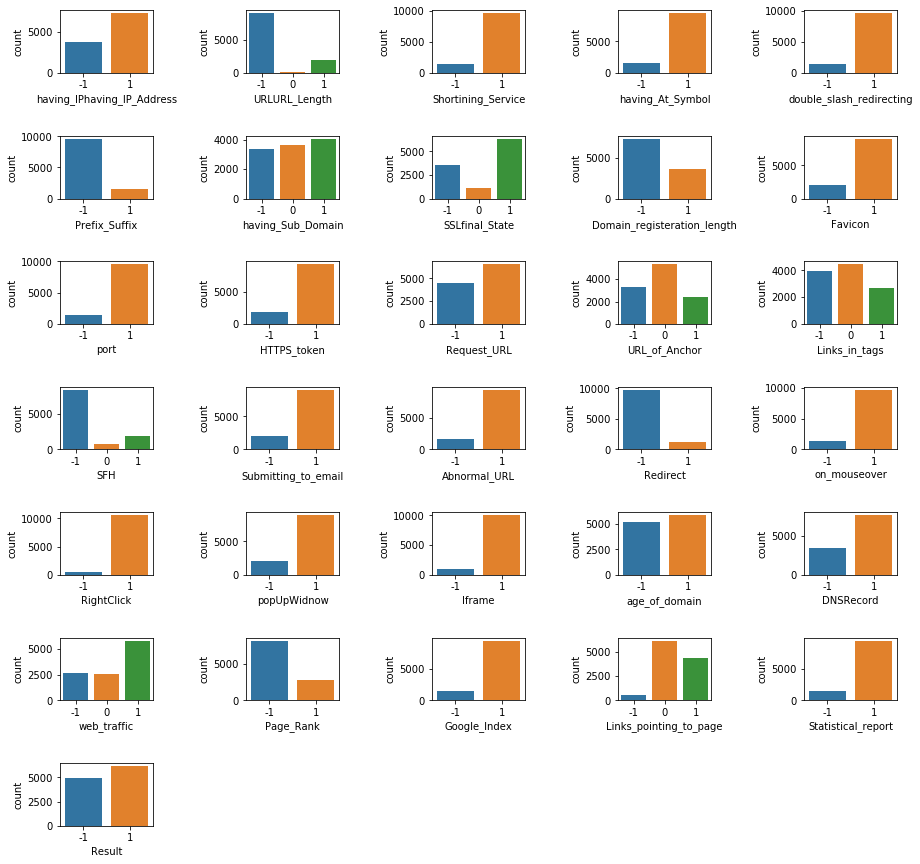

In [10]:
plt.figure(figsize=(15,15))
grid = plt.GridSpec(7, 5, wspace = 1, hspace = 1)
for i,col in enumerate(df.columns):
    plt.subplot(grid[i])
    sns.countplot(df[col])

In [11]:
for i in df.columns:
    print(df[i].value_counts().sort_index()/df.shape[0])

-1    0.343103
 1    0.656897
Name: having_IPhaving_IP_Address, dtype: float64
-1    0.810493
 0    0.012212
 1    0.177295
Name: URLURL_Length, dtype: float64
-1    0.13062
 1    0.86938
Name: Shortining_Service, dtype: float64
-1    0.149706
 1    0.850294
Name: having_At_Symbol, dtype: float64
-1    0.129263
 1    0.870737
Name: double_slash_redirecting, dtype: float64
-1    0.867481
 1    0.132519
Name: Prefix_Suffix, dtype: float64
-1    0.304206
 0    0.327635
 1    0.368159
Name: having_Sub_Domain, dtype: float64
-1    0.321755
 0    0.105563
 1    0.572682
Name: SSLfinal_State, dtype: float64
-1    0.668385
 1    0.331615
Name: Domain_registeration_length, dtype: float64
-1    0.185708
 1    0.814292
Name: Favicon, dtype: float64
-1    0.135866
 1    0.864134
Name: port, dtype: float64
-1    0.16246
 1    0.83754
Name: HTTPS_token, dtype: float64
-1    0.406603
 1    0.593397
Name: Request_URL, dtype: float64
-1    0.296879
 0    0.482768
 1    0.220353
Name: URL_of_Anchor, dty

Unique values in each column

In [12]:
for i in df.columns:
    print(i,df[i].unique())

having_IPhaving_IP_Address [-1  1]
URLURL_Length [ 1  0 -1]
Shortining_Service [ 1 -1]
having_At_Symbol [ 1 -1]
double_slash_redirecting [-1  1]
Prefix_Suffix [-1  1]
having_Sub_Domain [-1  0  1]
SSLfinal_State [-1  1  0]
Domain_registeration_length [-1  1]
Favicon [ 1 -1]
port [ 1 -1]
HTTPS_token [-1  1]
Request_URL [ 1 -1]
URL_of_Anchor [-1  0  1]
Links_in_tags [ 1 -1  0]
SFH [-1  1  0]
Submitting_to_email [-1  1]
Abnormal_URL [-1  1]
Redirect [-1  1]
on_mouseover [ 1 -1]
RightClick [ 1 -1]
popUpWidnow [ 1 -1]
Iframe [ 1 -1]
age_of_domain [-1  1]
DNSRecord [-1  1]
web_traffic [-1  0  1]
Page_Rank [-1  1]
Google_Index [ 1 -1]
Links_pointing_to_page [ 1  0 -1]
Statistical_report [-1  1]
Result [-1  1]


In [13]:
lst = []
for i in range(df.columns.shape[0]):
    for col in df.columns[i+1:]:
        if (df[df.columns[i]] == df[col]).all():
            lst.append((i,col))

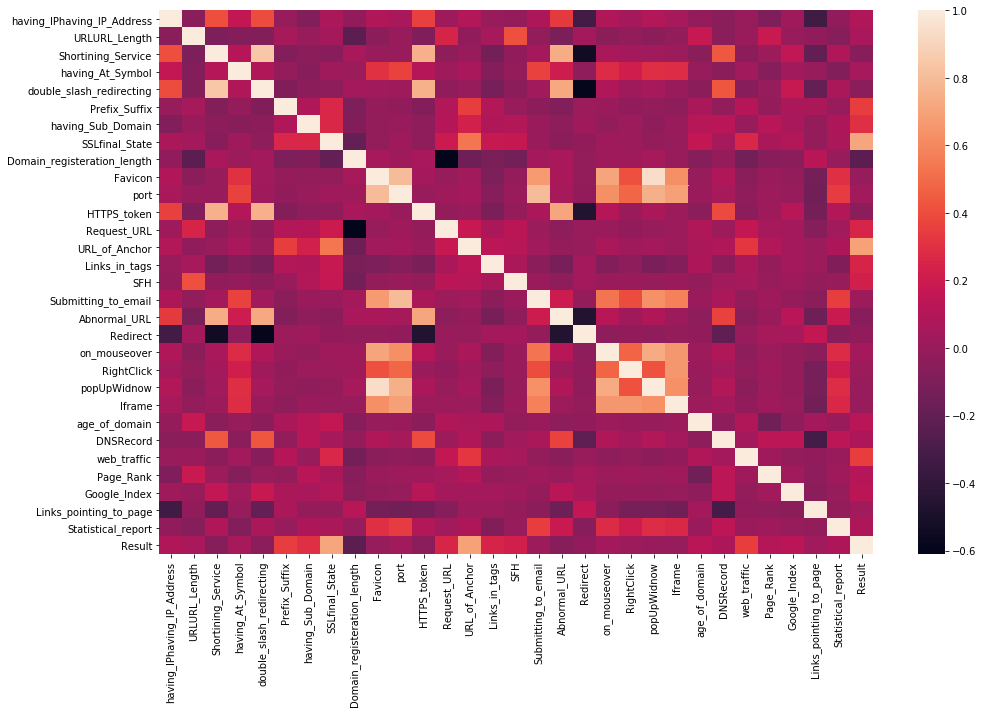

In [14]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr())
plt.show()

In [15]:
df = df.drop(columns=['popUpWidnow','Favicon','Submitting_to_email','Shortining_Service','double_slash_redirecting','HTTPS_token'])

The heatmap clarity will be compromised considering the huge number of columns considered here. It is hence elaborated in the correlation matrix below

In [16]:
def cramers_v(x,y,):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

df.corr(cramers_v).style.applymap(lambda x: "background-color:green" if x>0.75 else '')

,having_IPhaving_IP_Address,URLURL_Length,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Abnormal_URL,Redirect,on_mouseover,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IPhaving_IP_Address,1.000000,0.054659,0.158432,0.004976,0.100734,0.089164,0.022537,0.060701,0.029579,0.109312,0.107678,0.099815,0.336281,0.320884,0.083765,0.042412,0.054364,0.010255,0.050528,0.012897,0.091556,0.028878,0.411617,0.018828,0.093968
URLURL_Length,0.054659,1.000000,0.089254,0.073674,0.020408,0.049451,0.227623,0.034592,0.252394,0.044208,0.043368,0.297746,0.147933,0.052634,0.072691,0.016125,0.015205,0.183649,0.041139,0.022753,0.184653,0.008443,0.094747,0.082991,0.072292
having_At_Symbol,0.158432,0.089254,1.000000,0.011352,0.060244,0.050385,0.015252,0.364521,0.027651,0.106914,0.089994,0.061324,0.203587,0.027763,0.279305,0.218879,0.283970,0.005245,0.047598,0.040318,0.064446,0.036695,0.047201,0.079991,0.052693
Prefix_Suffix,0.004976,0.073674,0.011352,1.000000,0.132230,0.283614,0.096515,0.022157,0.098403,0.360447,0.100980,0.102601,0.077244,0.015854,0.012166,0.024211,0.036442,0.073849,0.016267,0.148505,0.006529,0.067395,0.098179,0.002378,0.348337
having_Sub_Domain,0.100734,0.020408,0.060244,0.132230,1.000000,0.268555,0.105625,0.010450,0.123013,0.232948,0.084358,0.100267,0.045220,0.052899,0.034266,0.021505,0.011067,0.208446,0.125502,0.060108,0.133635,0.057800,0.026600,0.092728,0.379875
SSLfinal_State,0.089164,0.049451,0.050385,0.283614,0.268555,1.000000,0.204091,0.051461,0.214696,0.477057,0.126923,0.126159,0.046689,0.021230,0.032660,0.016199,0.031472,0.233236,0.055907,0.231362,0.110045,0.097690,0.030785,0.069123,0.777699
Domain_registeration_length,0.022537,0.227623,0.015252,0.096515,0.105625,0.204091,1.000000,0.022197,0.609774,0.165777,0.108472,0.137218,0.057838,0.016000,0.023487,0.023047,0.004060,0.062659,0.010269,0.134470,0.059679,0.039488,0.136091,0.001935,0.225596
port,0.060701,0.034592,0.364521,0.022157,0.010450,0.051461,0.022197,1.000000,0.027293,0.118616,0.082882,0.014414,0.053754,0.022059,0.622890,0.480981,0.686586,0.008194,0.054564,0.031434,0.017652,0.005032,0.146637,0.343607,0.036153
Request_URL,0.029579,0.252394,0.027651,0.098403,0.123013,0.214696,0.609774,0.027293,1.000000,0.200591,0.091750,0.131755,0.035774,0.002041,0.007860,0.019998,0.016614,0.090271,0.015734,0.161172,0.055524,0.046143,0.118687,0.035147,0.253187
URL_of_Anchor,0.109312,0.044208,0.106914,0.360447,0.232948,0.477057,0.165777,0.118616,0.200591,1.000000,0.102385,0.114322,0.036765,0.028637,0.100194,0.054252,0.074644,0.075525,0.102087,0.279806,0.111169,0.046386,0.048468,0.125271,0.734642


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Result').values,df['Result'].values)

In [18]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

C:\Users\ajayd\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:59<00:00,  2.04s/it]


In [19]:
models.sort_values(models.columns.tolist(),ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.97,0.97,0.97,0.97,0.51
RandomForestClassifier,0.97,0.97,0.97,0.97,0.42
BaggingClassifier,0.97,0.97,0.97,0.97,0.16
XGBClassifier,0.97,0.97,0.97,0.97,1.26
LGBMClassifier,0.96,0.96,0.96,0.96,0.17
DecisionTreeClassifier,0.96,0.96,0.96,0.96,0.03
ExtraTreeClassifier,0.95,0.95,0.95,0.95,0.03
SVC,0.94,0.94,0.94,0.94,0.87
AdaBoostClassifier,0.93,0.93,0.93,0.93,0.31


### Comparing lazypredict score for few models

#### LOGISTIC REGRESSION

In [20]:
from sklearn.linear_model import LogisticRegressionCV

In [21]:
model = LogisticRegressionCV()
model.fit(X_train,y_train)
print("Test accuracy", model.score(X_test,y_test))

Test accuracy 0.9247467438494935


In [22]:
from sklearn import metrics

In [23]:
def get_roc_curve(model, X_test, y_test):
    pred = model.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,)
    display.plot()  
    plt.show()      

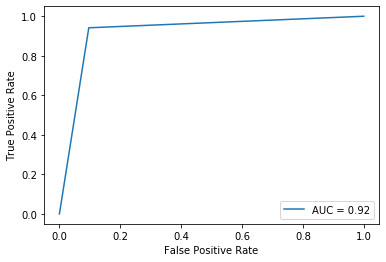

In [24]:
get_roc_curve(model, X_test, y_test)

#### RANDOM FOREST CLASSIFIER

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
print("Test accuracy", model.score(X_test,y_test))

Test accuracy 0.9717800289435601


In [27]:
from sklearn import metrics

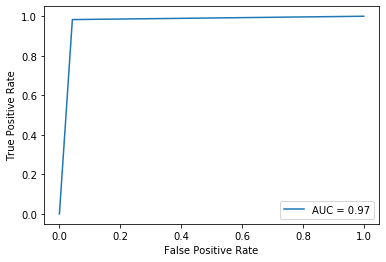

In [28]:
get_roc_curve(model, X_test, y_test)

#### The accuracy values correspond to lazypredict's output

#### Random forest seems to provide the best results. Validate with k-Cross fold validation

In [29]:
from sklearn.model_selection import cross_validate

In [30]:
val_score = cross_validate(RandomForestClassifier(),np.concatenate((X_train,X_test)),np.concatenate((y_train,y_test)),return_train_score=True,cv=10,n_jobs=-1)

In [31]:
for key in val_score.keys():
    print(key,val_score[key].sum()/val_score[key].shape[0])

fit_time 0.7716999053955078
score_time 0.03149912357330322
test_score 0.9730438660371646
train_score 0.9893662866549049


#### Average score of Random forest model on 10 fold cross validation for test data is 97.3